# Created By:


**Name:** Hrishikesh Shinde

**Employee ID:** 214966

**Email ID:** Hrishikesh.Shinde@kpit.com

# Importing Libraries



**Folium**: To plot Points on Map

*Installation: pip install folium*

---

**Pandas**: To import dataset

*Installation: pip install pandas*

---

**Matplotlib**: To plot Graphs

*Installation: python -m pip install -U matplotlib*

---

**MPL_toolkits**: To plot 3 Dimensional Plot

*Installation: pip install --upgrade matplotlib*

---

**Sys:** Used for exit

*Installation: Pre-Installed*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import folium
from mpl_toolkits.mplot3d import Axes3D
import sys

# Importing Dataset

OBD Dataset name should be data.xlsx


In [2]:
data = pd.read_excel('data.xlsx')

# Function To Plot Points On Map and Displaying Map

Here I have used Folium Library which helps us to plot points and route on map.

Also, different markers are used to display different inferences. 

**Click on the marker on map to view inference.**

In [3]:
def show_map(latitude,longitude,mode):
  global data

  df = pd.DataFrame(list(zip(latitude, longitude)), columns =['Latitude', 'Longitude']) 
  folium.PolyLine([[17.34112692,78.53707726],[17.343478,78.537446],[17.344434,78.532063],[17.350722, 78.531215],[17.354496,78.532169],[17.359157,78.532971],[17.361981,78.533717],[17.364837, 78.534768],[17.366834, 78.535573],[17.368124, 78.535777],[17.368616, 78.519888],[17.370097, 78.514753],[17.374667, 78.514753],[17.376380, 78.514597],[17.381937, 78.518284],[17.386574, 78.516584],[17.392033, 78.516217],[17.391306, 78.510949],[17.393834, 78.510797],[17.395836, 78.511066],[17.397461, 78.512021],[17.39771674,78.51151644]]).add_to(map1)
  folium.RegularPolygonMarker(location=[17.34112692, 78.53707726],popup = 'Start Point',color ='blue',radius=10,fill_color='yellow',number_of_sides= 5).add_to(map1)
  folium.RegularPolygonMarker(location=[17.39771674,78.51151644],popup = 'End Point',color ='blue',radius=10,fill_color='green',number_of_sides= 5).add_to(map1)

  #different marker to show different inferences
  if mode == 1:
    df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],popup= 'Pothole').add_to(map1), axis=1)
  elif mode==2:
    df.apply(lambda row:folium.Marker(location  =[row["Latitude"], row["Longitude"]],popup = 'Engine Over Heated Point',icon=folium.Icon(color='red', icon ='info-sign')).add_to(map1), axis=1)
  elif mode==3:
    df.apply(lambda row:folium.RegularPolygonMarker(location=[row["Latitude"], row["Longitude"]],popup = 'High Fuel Consumed Point \n(Put Next Gear or Go Slow)').add_to(map1), axis=1)
  elif mode ==4:
    df.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]],popup = 'Rash Driving Point',icon =folium.Icon(color='black', icon='car', icon_color="red", prefix='fa')).add_to(map1), axis=1)
  elif mode == 5:
    df.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]],popup = 'Hard Breaking Point',icon =folium.Icon(color='cadetblue', icon='exclamation', icon_color="red", prefix='fa')).add_to(map1), axis=1)
  display(map1)

In [4]:
def map_display_all():
  next_gear()
  pothole_detection()
  hard_breaking()
  rash_driving()
  Engine_Overheat_Detection()

# 1. Engine Overheat Detection

Plot of time vs coolent temperature to check the over heating of engine

OverHeating Threshold value for coolent temprature is set to 90°C

**OverHeating Conditions:**
  
1) Coolent Temperature > above 90°C

In [5]:
over_heat_latitude = []
over_heat_longitude = []
over_heat_time = []
over_heat_temp = []

def Engine_Overheat_Detection():
  global data
  global over_heat_latitude
  global over_heat_longitude
  global over_heat_time
  global over_heat_temp
  time = data['Trip Time(Since journey start)(s)']
  engine_temp = data['Engine Coolant Temperature(Â°C)']
  label = 'Over Heated Engine Points'
  over_heat_threshold_x = [[0],[data['Trip Time(Since journey start)(s)'][data['Trip Time(Since journey start)(s)'].count()-1]]]
  over_heat_threshold_y = [[90],[90]]
  counter = 0
  plt.plot(time,engine_temp,linewidth =.5)
  plt.plot(over_heat_threshold_x,over_heat_threshold_y,label = 'Engine over heat Threshold')

  print('----------------- Engine Over Heated at -----------------\n')
  print(' DEVICE TIME \t\t LATITUDE \t LONGITUDE \t TEMPERATURE')
  for n in range(data['Trip Time(Since journey start)(s)'].count()):
    if (data['Engine Coolant Temperature(Â°C)'][n]>90):
      over_heat_latitude.append(data[' Latitude'][n])
      over_heat_longitude.append(data[' Longitude'][n])
      over_heat_time.append(data['Trip Time(Since journey start)(s)'][n])
      over_heat_temp.append(data['Engine Coolant Temperature(Â°C)'][n])
      counter +=1
      print(f"{data[' Device Time'][n]} \t {data[' Latitude'][n]} \t {data[' Longitude'][n]} \t {data['Engine Coolant Temperature(Â°C)'][n]}")
  print(f'\n--------------------- Over Heated {counter} times -------------------------------\n')
  plt.scatter(over_heat_time,over_heat_temp,label = label,color='red',marker='.')
  label = "_nolegend_"
  plt.legend()
  plt.xlabel('Trip Time(Since journey start)(s)')
  plt.ylabel('Engine Coolant Temperature(Â°C)')
  plt.show()
  print('\n\n')
  Engine_Overheat_Detection_zoom()

Zoom View to get a clear picture of overheated points

In [6]:
def Engine_Overheat_Detection_zoom():
  global data
  global over_heat_latitude
  global over_heat_longitude
  global over_heat_time
  global over_heat_temp

  time = data['Trip Time(Since journey start)(s)'][705:750]
  engine_temp = data['Engine Coolant Temperature(Â°C)'][705:750]
  over_heat_threshold_x = [[690],[740]]
  over_heat_threshold_y = [[90],[90]]
  label = 'Over Heated Engine Points'

  plt.plot(time,engine_temp,linewidth =2)
  print('\n\nMore Clear View of Over Heated Engine Points')
  plt.plot(over_heat_threshold_x,over_heat_threshold_y,label = 'Engine over heat Threshold')
  plt.scatter(over_heat_time,over_heat_temp,label = label,color='red',marker='.',linewidths=2)
  label = "_nolegend_"  
  plt.legend()
  plt.xlabel('Trip Time(In between Journey)(s)')
  plt.ylabel('Engine Coolant Temperature(Â°C)')
  plt.show()
  print('\n\n')
  
  show_map(over_heat_latitude,over_heat_longitude,2)

# 2. Rash Driving Detection

Plotted points when driver was rash driving

Used Pedal Position sensor threshold value = 58

Also checked weather the car is in forward motion or not, using accelerometer X-axis values

---



**Rash Driving Conditions**: 

When Car is moving accelerometer's

  1) Positive values indicate an increase in velocity.

  2) Negative values indicate an decrease in velocity.
    
  3) Zero values indicate constant velocity 

Here we considered the positive value and zero value to confirm the vehicle is motion or not.

Then we detected the value if pedal position. 

Accelerator PedalPosition D(%)>58

Engine RPM > 800


If both condition match rash driving is detected


In [7]:
rash_latitude = []
rash_longitude = []
rash_time = []
rash_pedal_position = []

def rash_driving():
  global data
  global rash_latitude
  global rash_longitude
  global rash_time
  global rash_pedal_position

  time = data['Trip Time(Since journey start)(s)']
  pedal_position = data['Accelerator PedalPosition D(%)']

  plt.plot(time,pedal_position)
  counter = 0
  print('-------------------------- Rash Driving Detected at --------------------------\n')
  print(' DEVICE TIME \t\t LATITUDE \t\t LONGITUDE \t\t PEDAL POSITION \n')
  for n in range(data['Accelerator PedalPosition D(%)'].count()):
    if data['Accelerator PedalPosition D(%)'][n]>58 and data['Acceleration Sensor(X axis)(g)'][n]>=0 and data['Engine RPM(rpm)'][n]>900:
      counter += 1
      rash_latitude.append(data[' Latitude'][n])
      rash_longitude.append(data[' Longitude'][n])
      rash_time.append(data['Trip Time(Since journey start)(s)'][n])
      rash_pedal_position.append(data['Accelerator PedalPosition D(%)'][n])
      print(f"{data[' Device Time'][n]} \t\t {data[' Latitude'][n]} \t {data[' Longitude'][n]} \t {data['Accelerator PedalPosition D(%)'][n]}")
    
  print(f'\n--------------------- Rash Driving Detected {counter} times -------------------------------')
  plt.scatter(rash_time,rash_pedal_position,label ='Rash Driving Points',color='red',marker='.')
  plt.legend()
  plt.xlabel('Trip Time(Since journey start)(s)')
  plt.ylabel('Accelerator PedalPosition D(%)')
  plt.show()

  rash_driving_zoom_view()
  

Zoom View to get a clear picture of Rash Driving points

In [8]:
def rash_driving_zoom_view():
  global data
  global rash_latitude
  global rash_longitude
  global rash_time
  global rash_pedal_position

  time = data['Trip Time(Since journey start)(s)'][1503:1928]
  pedal_position = data['Accelerator PedalPosition D(%)'][1503:1928]
  print('\n\nMore Clear View of Rash Driving Points')
  plt.plot(time,pedal_position)
  plt.scatter(rash_time,rash_pedal_position,label = 'Rash Driving Points',color='red',marker='.',linewidths=2)
  label = "_nolegend_"  
  plt.legend(loc = 'lower right',edgecolor= 'black')
  plt.xlabel('Trip Time(In between Journey)(s)')
  plt.ylabel('Accelerator PedalPosition D(%)')
  plt.show()
  print('\n\n')
  show_map(rash_latitude,rash_longitude,4)

# 3. Pothole Detection

Function To detect the number of potholes

**Pothole Detection Conditions:**

  1) Threshold for Acceleration Total (g) <-0.19


In [9]:
pothole_latitude = []
pothole_longitude = []
pothole_time = []
pothole_value = []

def pothole_detection():
  global data
  global pothole_latitude
  global pothole_longitude
  global pothole_time
  global pothole_value

  time = data['Trip Time(Since journey start)(s)']
  accleration = data['Acceleration Sensor(Total)(g)']

  thresholdx = [[0],[data['Trip Time(Since journey start)(s)'][data['Trip Time(Since journey start)(s)'].count()-1]]]
  thresholdy = [[-0.19],[-0.19]]

  plt.plot(time,accleration)
  plt.plot(thresholdx,thresholdy,linewidth = 0.5, color = 'red',label = 'Threshold')
  plt.plot()
  pothole_counter = 0
  print('--------------------------------- Pothole Detected at --------------------------\n')
  print(' DEVICE TIME \t\t LATITUDE \t\t LONGITUDE \t\t ACCELEROMETER VALUE\n')
  for n in range(data['Trip Time(Since journey start)(s)'].count()):
    if(data['Acceleration Sensor(Total)(g)'][n]<-.19):
      pothole_counter +=1
      pothole_latitude.append(data[' Latitude'][n])
      pothole_longitude.append(data[' Longitude'][n])
      pothole_time.append(data['Trip Time(Since journey start)(s)'][n])
      pothole_value.append(data['Acceleration Sensor(Total)(g)'][n])
      print(f"{data[' Device Time'][n]} \t\t {data[' Latitude'][n]} \t {data[' Longitude'][n]} \t {data['Acceleration Sensor(Total)(g)'][n]}")
  print(f'\n----------------------------- {pothole_counter} Pothole Detected  -------------------------------\n')
  plt.scatter(pothole_time,pothole_value,label ='Pothole Points',color='red',marker='.')
  plt.legend()
  plt.xlabel('Trip Time(Since journey start)(s)')
  plt.ylabel('Acceleration Sensor(Total)(g)')
  plt.show()
  print('\n\nZoom View of points\n')
  pothole_detection_zoom_view()

Zoom view of pothole points to get a better picture of it

In [10]:
def pothole_detection_zoom_view():
  global data
  global pothole_latitude
  global pothole_longitude
  global pothole_time
  global pothole_value
  time = data['Trip Time(Since journey start)(s)'][1470:1528]
  pedal_position = data['Acceleration Sensor(Total)(g)'][1470:1528]  

  thresholdx = [[data['Trip Time(Since journey start)(s)'][1470]],[data['Trip Time(Since journey start)(s)'][1528]]]
  thresholdy = [[-0.19],[-0.19]]

  plt.plot(time,pedal_position)
  plt.plot(thresholdx,thresholdy,linewidth = 0.5, color = 'red',label = 'Threshold')
  plt.scatter(pothole_time,pothole_value,label ='Pothole Points',color='red',marker='.',linewidths=2)
  label = "_nolegend_"  
  plt.legend(loc ='center left')
  plt.xlabel('Trip Time(In between Journey)(s)')
  plt.ylabel('Accelerator PedalPosition D(%)')
  plt.show() 
  print('\n\n')
  show_map(pothole_latitude,pothole_longitude,1)

# 4. High Fuel Consuption Detection (Put Next Gear or Go Slow)

To check high consuption fuel points.

When driver tries to run his vehicle on same gear without putting into next gear. High fuel consuption is detected. 

**Alerts Driver to Put next Gear or Go Slow**

**Conditions To Detect:**

1) Acceleration Pedal Positon > 55

2) Fuel Consuption Rate > 0.029

3) Throttel Position > 80


In [11]:
extra_fuel_consuption_latitude = []
extra_fuel_consuption_longitude = []
extra_fuel_consuption_time = []
extra_fuel_consuption_value = []
extra_fuel_paddle_position = []
extra_fuel_throttle_position = []

def next_gear():
  global data
  global extra_fuel_consuption_latitude
  global extra_fuel_consuption_longitude
  global extra_fuel_consuption_time
  global extra_fuel_consuption_value
  global extra_fuel_paddle_position
  global extra_fuel_throttle_position

  fig = plt.figure(figsize=plt.figaspect(0.25))
  ax = fig.add_subplot(121, projection='3d')

  high_fuel_consuption_counter =0
  time =data['Trip Time(Since journey start)(s)']
  pedal_position =data['Accelerator PedalPosition D(%)']
  fuel =data['Fuel flow rate/minute(gal/min)']
  throttel = data['Throttle Position(Manifold)(%)']

  print('------------------------ INDICATION TO PUT NEXT GEAR or GO SLOW ----------------------\n')
  print('-------------------------- High Fuel Consuption Detected at --------------------------\n')
  print(' DEVICE TIME \t\t LATITUDE \t\t LONGITUDE \t\t HIGH FUEL CONSUPTION\n')
  for n in range(data['Trip Time(Since journey start)(s)'].count()):
    if (data['Accelerator PedalPosition D(%)'][n] >55 and data['Fuel flow rate/minute(gal/min)'][n]>0.029 and data['Throttle Position(Manifold)(%)'][n]>80):
      high_fuel_consuption_counter +=1
      extra_fuel_consuption_latitude.append(data[' Latitude'][n])
      extra_fuel_consuption_longitude.append(data[' Longitude'][n])
      extra_fuel_consuption_time.append(data['Trip Time(Since journey start)(s)'][n])
      extra_fuel_consuption_value.append(data['Fuel flow rate/minute(gal/min)'][n])
      extra_fuel_paddle_position.append(data['Accelerator PedalPosition D(%)'][n])
      extra_fuel_throttle_position.append(data['Throttle Position(Manifold)(%)'][n])
      print(f"{data[' Device Time'][n]} \t {data[' Latitude'][n]} \t {data[' Longitude'][n]} \t {data['Fuel flow rate/minute(gal/min)'][n]}")

  print(f'\n--------------------- High Fuel Consuption Detected {high_fuel_consuption_counter} times -------------------------------\n')
  ax.scatter(time, pedal_position, fuel, c='g', marker='o',s=0.3,label = 'Efficient Fuel Consumption')
  ax.scatter(extra_fuel_consuption_time,extra_fuel_paddle_position,extra_fuel_consuption_value,c='r',marker='*',label = 'High Fuel Consumption at Low Speed\n(Put Next GEAR Indication)')
  ax.set_title('Fuel consumption w.r.t pedal position')
  ax.legend(loc = 'center left')
  ax.set_xlabel('Trip Time(s)')
  ax.set_ylabel('PedalPosition D(%)')
  ax.set_zlabel('Fuel flow (gal/min)')

  
  ax = fig.add_subplot(122, projection='3d')
  ax.scatter(time, throttel, fuel, c='g', marker='o',s=0.3,label = 'Efficient Fuel Consumption')
  ax.scatter(extra_fuel_consuption_time,extra_fuel_throttle_position,extra_fuel_consuption_value,c='r',marker='*',label = 'High Fuel Consumption at Low Speed\n(Put Next GEAR Indication)')
  ax.set_title('Fuel consumption w.r.t Throttel Position')
  ax.legend(loc ='center left')
  ax.set_xlabel('Trip Time(s)')
  ax.set_ylabel('Throttle Position%)')
  ax.set_zlabel('Fuel flow(gal/min)')

  plt.show()
  print('\n\n')
  show_map(extra_fuel_consuption_latitude,extra_fuel_consuption_longitude,3)


# 5. Hard Braking Detection

Hard Breaking Points detected.

When there is sudden drop in engine rpm and engine load hard braking is detected

**Conditions to detect:**

1) Difference between two consecutive Engine RPM should be more than -950

2) Difference between two consecutive Engine Load should be more than -70

In [12]:
hard_breaking_latitude = []
hard_breaking_longitude = []


def hard_breaking():
  global data
  global hard_breaking_latitude 
  global hard_breaking_longitude
  
  time = data['Trip Time(Since journey start)(s)']
  load = data['Engine Load(%)']
  rpm = data['Engine RPM(rpm)']
  hard_breaking_counter = 0
  ax = plt.axes(projection='3d')
  ax.scatter(time, load, rpm,s=1,label = 'Normal Breaking')
  hard_breaking_label = 'Hard Breaking Points'
  print('-------------------------- Hard Braking Detected at --------------------------\n')
  print('LATITUDE \t\t LONGITUDE \t\t ENGINE RPM DROPPED TO\t\t ENGINE LOAD DROPPED TO\n')
  for n in range(data['Trip Time(Since journey start)(s)'].count()-1):
    if data['Engine RPM(rpm)'][n+1] - data['Engine RPM(rpm)'][n]<-950 and data['Engine Load(%)'][n+1] - data['Engine Load(%)'][n]>-70:
      hard_breaking_counter +=1
      hard_breaking_latitude.append(data[' Latitude'][n+1])
      hard_breaking_longitude.append(data[' Longitude'][n+1])
      ax.scatter(data['Trip Time(Since journey start)(s)'][n+1],data['Engine Load(%)'][n+1],data['Engine RPM(rpm)'][n+1],color = 'r',linewidth =1,marker = '*',label = hard_breaking_label)
      hard_breaking_label = '__nolabel__'  
      print(f"{data[' Latitude'][n+1]} \t {data[' Longitude'][n+1]} \t {data['Engine RPM(rpm)'][n+1]} \t\t\t {data['Engine Load(%)'][n+1]}")
  print(f'\n--------------------- Hard Braking Detected {hard_breaking_counter} times -------------------------------\n')
  ax.legend(edgecolor= 'black')
  ax.set_title('Hard Braking Graph')
  ax.set_xlabel('Trip Time(s)')
  ax.set_ylabel('Engine Load(%)')
  ax.set_zlabel('Engine RPM(rpm)')
  plt.show()
  print('\n\n')
  show_map(hard_breaking_latitude,hard_breaking_longitude,5)

# User Choice


As per the user's choice the inference will be displayed


In [13]:
def user_choice(choice):
  if choice == 1:
    next_gear()
    print_last()
    main()
  elif choice == 2:
    pothole_detection()
    print_last()
    main()
  elif choice == 3:
    hard_breaking()
    print_last()
    main()
  elif choice == 4:
    rash_driving()
    print_last()
    main()
  elif choice == 5:
    Engine_Overheat_Detection()
    print_last()
    main()
  elif choice == 6:
    map_display_all()
    print_last()
    main()
  elif choice == 7:
    sys.exit()

In [14]:
def print_last():    
  print('--------------------------------------------------------------------------\n')
  print('Scroll Up above the Map to View OUTPUT DATA and GRAPHS\n')
  print('Click on the icons on maps to see information of icon')
  print('--------------------------------------------------------------------------\n')

# Program Starts Here (Main)



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Inferences ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Select Your Choice

1. High Fuel Consuption Detection (Put next gear or Go Slow)

2. Pothole Detection

3. Hard Braking

4. Rash Driving Detector

5. Engine Overheat Detection

6. Display All

7. Exit

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Enter Number
2
--------------------------------- Pothole Detected at --------------------------

 DEVICE TIME 		 LATITUDE 		 LONGITUDE 		 ACCELEROMETER VALUE

00:58:35 		 17.369277513333333 	 78.51759436666666 	 -0.23311444
00:58:39 		 17.369317006666666 	 78.51745743333333 	 -0.19981611

----------------------------- 2 Pothole Detected  -------------------------------



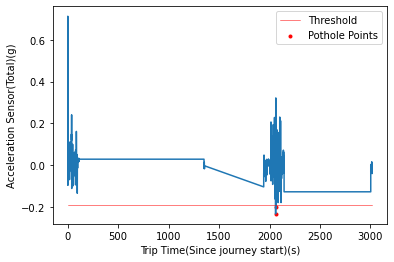



Zoom View of points



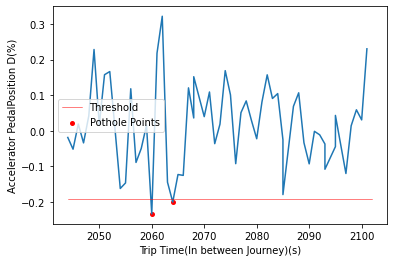

--------------------------------------------------------------------------

Scroll Up above the Map to View OUTPUT DATA and GRAPHS

Click on the icons on maps to see information of icon
--------------------------------------------------------------------------

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Inferences ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Select Your Choice

1. High Fuel Consuption Detection (Put next gear or Go Slow)

2. Pothole Detection

3. Hard Braking

4. Rash Driving Detector

5. Engine Overheat Detection

6. Display All

7. Exit

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Enter Number
4
-------------------------- Rash Driving Detected at --------------------------

 DEVICE TIME 		 LATITUDE 		 LONGITUDE 		 PEDAL POSITION 

00:59:21 		 17.36973168666667 	 78.51601963333333 	 58.4313736
00:59:22 		 17.36974156 	 78.51598539999999 	 58.4313736
00:59:23 		 17.369751433333334 	 78.51595116666667 	 58.4313736
00:01:37 		 17.37498105 	 78.51472439999999 	 58

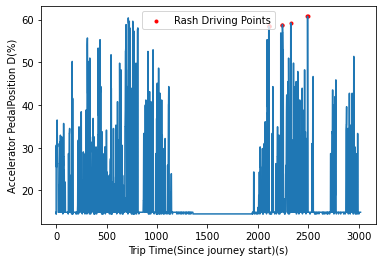



More Clear View of Rash Driving Points


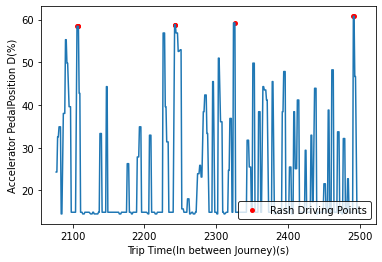

--------------------------------------------------------------------------

Scroll Up above the Map to View OUTPUT DATA and GRAPHS

Click on the icons on maps to see information of icon
--------------------------------------------------------------------------

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Inferences ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Select Your Choice

1. High Fuel Consuption Detection (Put next gear or Go Slow)

2. Pothole Detection

3. Hard Braking

4. Rash Driving Detector

5. Engine Overheat Detection

6. Display All

7. Exit

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
def main():
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Inferences ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('\nSelect Your Choice')
  print('\n1. High Fuel Consuption Detection (Put next gear or Go Slow)\n\n2. Pothole Detection\n\n3. Hard Braking\n\n4. Rash Driving Detector\n\n5. Engine Overheat Detection\n\n6. Display All\n\n7. Exit\n')
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  while(1):
    try:
      choice = int(input('Enter Number\n'))
      if choice>=8 or choice<=0:
        print('Enter Correct Choice\n')
        continue
      else:
        break
    except:
      print('Wrong Input\n')
  user_choice(choice)


if __name__ == "__main__":
  map1 = folium.Map(location=[17.34112692,78.53707726],tiles='cartodbpositron',zoom_start=12,width=750, height=600)
  main()

## 